Build a random forest classifier to predict the risk of heart disease based on a dataset of patient
information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type,
resting blood pressure, serum cholesterol, and maximum heart rate achieved.

Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the
numerical features if necessary.

In [1]:
import pandas as pd
df = pd.read_csv("dataset.csv")

In [2]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [12]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

df.nunique().sort_values()

No Encoding is required as all dataypes are already in numerical format also random forest does not require feature scaling

In [14]:
x = df.drop("target", axis=1)
y = df[['target']]

In [17]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [20]:
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [21]:
y.value_counts()

target
1         165
0         138
dtype: int64

Q2. Split the dataset into a training set (70%) and a test set (30%).

In [22]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state= 42)

In [23]:
xtrain.shape

(212, 13)

In [24]:
xtest.shape

(91, 13)

Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each
tree. Use the default values for other hyperparameters.

In [25]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, max_depth= 10)

In [26]:
rfc.fit(xtrain,ytrain.values.flatten())

RandomForestClassifier(max_depth=10)

Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

In [27]:
# Creating a function to evaluate model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluate_model(x,y,model):
    ypred = model.predict(x)
    acc = accuracy_score(y,ypred)
    pre = precision_score(y,ypred)
    rec = recall_score(y,ypred)
    f1 = f1_score(y,ypred)
    print(f'Accuracy Score  : {acc:.4f}')
    print(f'Precision Score : {pre:.4f}')
    print(f'Recall Score    : {rec:.4f}')
    print(f'F1 Score        : {f1:.4f}')
    return acc, pre, rec, f1

In [28]:
# Evaluate model on test data
acc_base, pre_base, rec_base, f1_base = evaluate_model(xtest, ytest, rfc)

Accuracy Score  : 0.8132
Precision Score : 0.8235
Recall Score    : 0.8400
F1 Score        : 0.8317


In [29]:
from sklearn.metrics import classification_report
ypred_test = rfc.predict(xtest)
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



<AxesSubplot: >

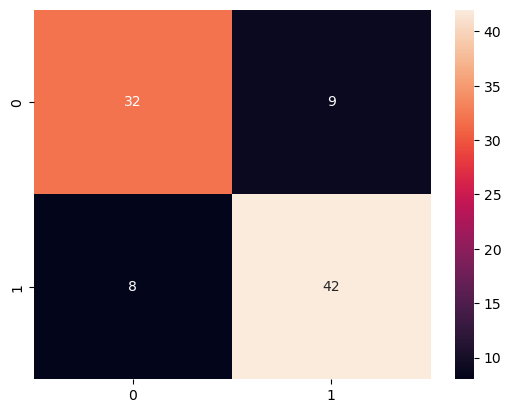

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf = confusion_matrix(ytest,ypred_test)
sns.heatmap(cf, annot=True, fmt='d')

Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart
disease risk. Visualise the feature importances using a bar chart.

In [31]:
rfc.feature_importances_


array([0.07744072, 0.02954894, 0.12009213, 0.06945792, 0.07317613,
       0.0146871 , 0.01833694, 0.11082006, 0.0716039 , 0.09114259,
       0.05355667, 0.15335475, 0.11678215])

In [32]:
rfc.feature_names_in_

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype=object)

In [33]:
imp = pd.Series(rfc.feature_importances_)
imp.index = rfc.feature_names_in_
imp = imp.sort_values(ascending=False)
imp

ca          0.153355
cp          0.120092
thal        0.116782
thalach     0.110820
oldpeak     0.091143
age         0.077441
chol        0.073176
exang       0.071604
trestbps    0.069458
slope       0.053557
sex         0.029549
restecg     0.018337
fbs         0.014687
dtype: float64

In [34]:
top5 = list(imp[0:5].index)
print(f'Top 5 features in the data are : {top5}')

Top 5 features in the data are : ['ca', 'cp', 'thal', 'thalach', 'oldpeak']


<AxesSubplot: title={'center': 'Feature Importances Plot'}>

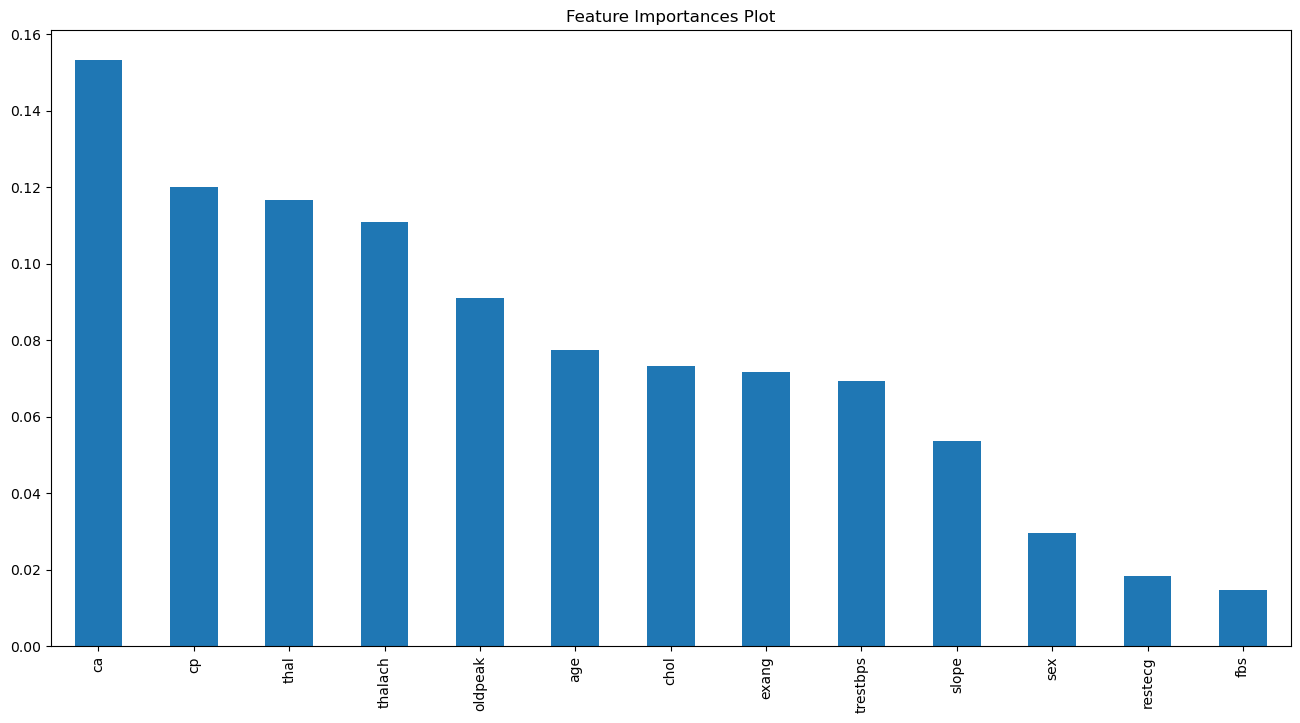

In [35]:
imp.plot(kind='bar',title='Feature Importances Plot', figsize=(16,8))

Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try
different values of the number of trees, maximum depth, minimum samples split, and minimum samples
leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

In [36]:
# Defining the parameters for tuning
parameters = {
    'n_estimators':[10,50,100,200,300,400],
    'max_depth':[4,5,6,7,8,9,10],
    'min_samples_leaf':[2,3,4,5,6],
    'min_samples_split':[2,5,10]
}

In [37]:
# Performing Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV
rscv = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=parameters,
                          cv=5, 
                          scoring='f1',
                          n_iter=50,
                          verbose=3)

In [38]:
rscv.fit(xtrain,ytrain.values.flatten())

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=0.889 total time=   0.3s
[CV 2/5] END max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=0.880 total time=   0.2s
[CV 3/5] END max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=0.808 total time=   0.3s
[CV 4/5] END max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=0.936 total time=   0.2s
[CV 5/5] END max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=0.762 total time=   0.3s
[CV 1/5] END max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=200;, score=0.884 total time=   0.5s
[CV 2/5] END max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=200;, score=0.833 total time=   0.5s
[CV 3/5] END max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=200;, score=0.800 total time=   0.5s
[C

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': [4, 5, 6, 7, 8, 9, 10],
                                        'min_samples_leaf': [2, 3, 4, 5, 6],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200, 300,
                                                         400]},
                   scoring='f1', verbose=3)

In [39]:
rscv.best_score_

0.8743422459893047

Q7. Report the best set of hyperparameters found by the search and the corresponding performance
metrics. Compare the performance of the tuned model with the default model.

In [40]:
# Best Parameters
rscv.best_params_

{'n_estimators': 50,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_depth': 4}

In [41]:
# Best Estimator (Model)
rscv.best_estimator_

RandomForestClassifier(max_depth=4, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=50)

In [42]:
# Best F1 Score
rscv.best_score_

0.8743422459893047

In [46]:
print('Results for Tuned Model :\n')
acc_tuned, pre_tuned , rec_tuned, f1_tuned = evaluate_model(xtest,ytest.values.flatten(),rscv)

Results for Tuned Model :

Accuracy Score  : 0.8462
Precision Score : 0.8600
Recall Score    : 0.8600
F1 Score        : 0.8600


In [47]:
dct = {
    'metrics':['accuracy','precision','recall','f1'],
    'base model':[acc_base,pre_base,rec_base,f1_base],
    'tuned model':[acc_tuned,pre_tuned,rec_tuned,f1_tuned]
}

In [48]:
df_compare = pd.DataFrame(dct)
df_compare

,metrics,base model,tuned model
0,accuracy,0.813187,0.846154
1,precision,0.823529,0.860000
2,recall,0.840000,0.860000
3,f1,0.831683,0.860000


Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the
decision boundaries on a scatter plot of two of the most important features. Discuss the insights and
limitations of the model for predicting heart disease risk.

In [49]:
best_rfc = rscv.best_estimator_
best_rfc

RandomForestClassifier(max_depth=4, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=50)

In [50]:
imp_tuned = best_rfc.feature_importances_
imp_tuned = pd.Series(imp_tuned)
imp_tuned.index = best_rfc.feature_names_in_
imp_tuned = imp_tuned.sort_values(ascending=False)
imp_tuned

exang       0.178082
ca          0.173164
thal        0.126655
cp          0.126605
oldpeak     0.096246
thalach     0.086346
slope       0.060617
age         0.051100
trestbps    0.028983
chol        0.027915
sex         0.027452
restecg     0.012484
fbs         0.004352
dtype: float64

In [51]:
imp_tuned[0:2]

exang    0.178082
ca       0.173164
dtype: float64

<AxesSubplot: title={'center': 'Feature Importances for tuned model'}>

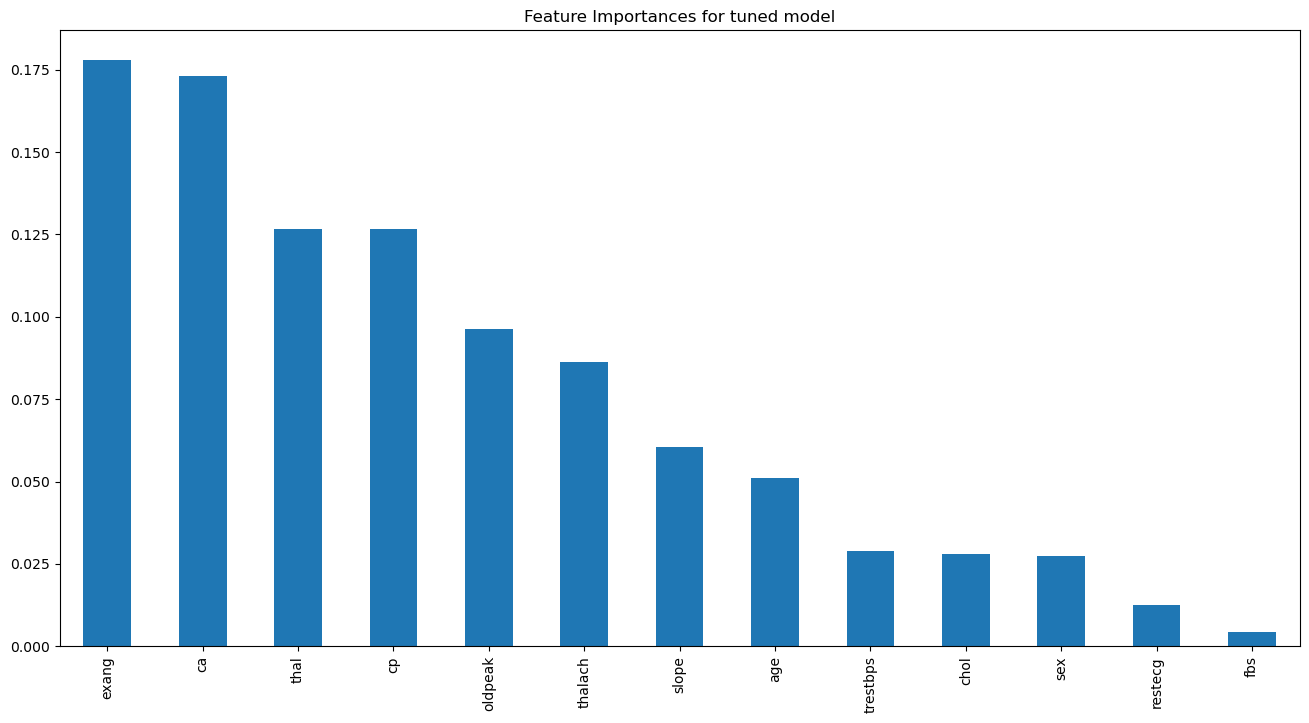

In [52]:
imp_tuned.plot(kind='bar',title='Feature Importances for tuned model',figsize=(16,8))

In [53]:
top2 = xtrain[['ca','cp']]
top2.head()

,ca,cp
124,0,2
72,0,1
15,0,2
10,0,0
163,4,2


In [54]:
df_top2 =pd.concat([top2,ytrain],axis=1)
df_top2.head()

,ca,cp,target
124,0,2,1
72,0,1,1
15,0,2,1
10,0,0,1
163,4,2,1


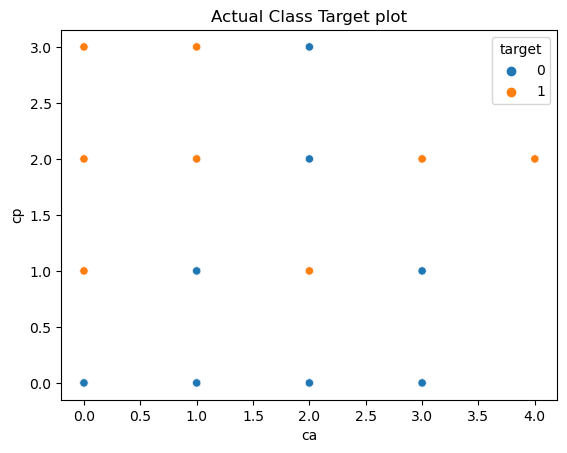

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df_top2,x='ca',y='cp',hue='target')
plt.title('Actual Class Target plot')
plt.show()

In [56]:
df_top2['predicted'] = best_rfc.predict(xtrain)


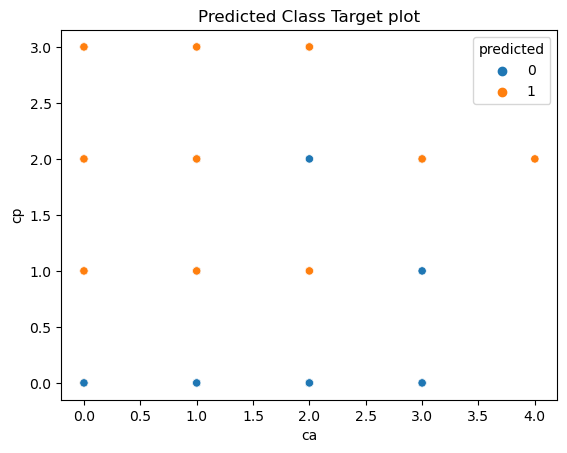

In [57]:
sns.scatterplot(data=df_top2,x='ca',y='cp',hue='predicted')
plt.title('Predicted Class Target plot')
plt.show()